## Base function

The sampled optical field on the line detector was previously simulated, the observations were:

1. There are 32 sampling points as the line detector has the same number of pixels. This was simulated using a window integration over a defined optical field defined by: $y = e^{-((x-\mu)/\sigma)^n}$. 

2. The parameters $\mu$ and $\sigma$ determine the lateral shift and width of the gaussian function respectively. These parameters are related to the incoming light angle from the sample and the material roughness.

3. The $\mu$ parameter was swept to simulate different incoming light angles. With this data, a histogram was then reconstructed and its standard deviation value was calculated.  

4. An oscillating pattern was observed in the histogram's standard deviation (Aq parameter). This is not ideal as this indicated a roughness change, however only the angle of the incoming light was being swept.

5. Hence, a new parameter that is constant as a function of $\mu$ has to be found. 

In order to obtain such new parameter a base function is proposed as shown in @fig-3-1 :

![a. Experimental data acquired at different incoming angles. b. Base function reconstruction](figures/b/fig_3_1_base.png){#fig-3-1}

The idea of the base function consists in reconstructing a reference function obtained from experimental data of a very smooth wafer (0.1 nm in roughness) at different angles in order to obtain a function that is constant as a function of $\mu$. This function will then be used as a reference parameter to compare with the experimental data of rougher wafers (1 nm). The reconstruction of the base function is illustrated in the previous image. 

## Base function simulation

The mathematical procedure for the base function reconstruction consists in sampling the optical fields at different incoming angles and the reshifting such points to the 0 deg reference, obtaining a higher density of sampling points instead of the limited 32 sampling points. This is shown in @fig-3-2 and @fig-3-3 (higher density of sampling points).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# define your custom theme as a dictionary of parameters
my_theme = {
    "figure.facecolor": "white", 
    "axes.facecolor": "white", # green
    "axes.edgecolor": "white",
    "axes.labelcolor": "#4E616A",
    "axes.grid": True,
    "grid.color": "#E0E0E0",
    "xtick.color": "black",
    "ytick.color": "black",
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "Tahoma"]
}


def plot_format_plt(xlabel, ylabel, xticks, yticks, ax):
    ax.set_xlabel(xlabel, fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.xaxis.set_major_locator(plt.MultipleLocator(xticks))  # Set x-axis tick frequency
    ax.yaxis.set_major_locator(plt.MultipleLocator(yticks))


def window_integration(axes, number_windows, window_size, gap, x, y, plot_bool):
    integration_points = []
    integration_axis = []
    count = 0

    for i in range(number_windows):
        # 1. Get the data inside the window and substract the gap points
        a = i*window_size
        b = i*window_size + window_size
        x_temp = x[a:b-gap:1]
        y_temp = y[a:b-gap:1]

        left_edge = x_temp[0]
        right_edge = x_temp[-1]
        
        integration = np.trapz(y_temp, x_temp, dx = x[1] - x[0])
        integration_points.append(integration)

        axis = x_temp[len(x_temp)//2]
        integration_axis.append(axis)

    return integration_axis, integration_points

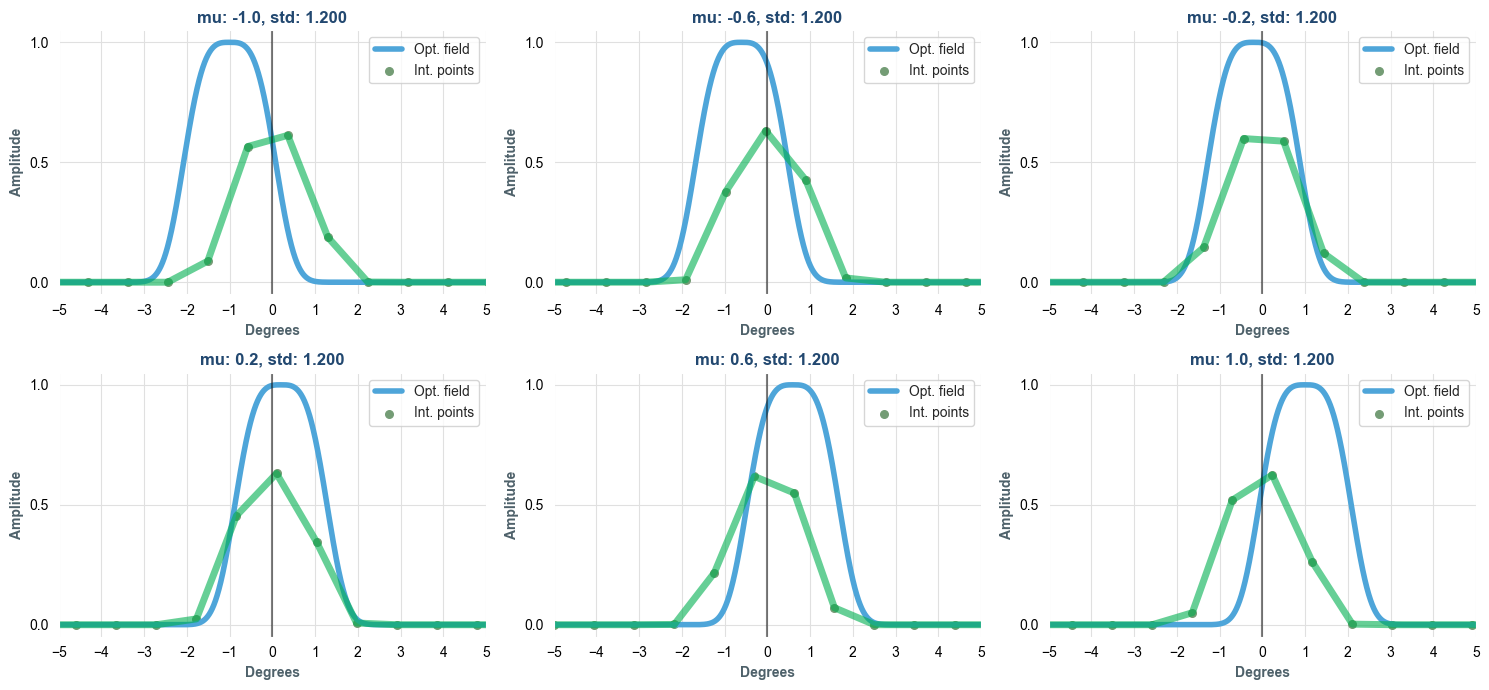

In [6]:
#| label: fig-3-2
#| fig-cap: "Reconstruction of base function from shifted optical fields"

mu_np = np.linspace(-1, 1, 6)
std_np = np.linspace(1.2, 1.3, 1)
n = 3.4
number_points = 10000
degrees = [-15, 15]
number_windows = 32
window_size = number_points//number_windows
gap = 100
plots_gaussian = []

rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 7), squeeze=False)
plot_count = 0 
# 2. Sweep mu parameter and do windown integration
for i in range(len(mu_np)):
    for j in range(len(std_np)):
        # b1. Perform window integration
        title = f"mu: {mu_np[i]:.1f}, std: {std_np[j]:.3f}"
        x = np.linspace(degrees[0], degrees[1], number_points)
        y = np.exp(-abs(((x-mu_np[i])/std_np[j]))**n)

        # b. Plot the optical field
        row = plot_count // cols
        col = plot_count % cols
        axes[row, col].set_title(title, color = '#224870', fontweight='bold')
        axes[row, col].plot(x, y, color = '#4EA5D9', linewidth=4, label='Opt. field')
        
        # c. Window integration
        integration_axis, integration_points = window_integration(axes, number_windows, window_size, gap, x, y, True)
        axes[row,col].plot(integration_axis-mu_np[i], integration_points, color = '#00B050', linewidth=5, alpha = 0.6)
        axes[row, col].scatter(integration_axis-mu_np[i], integration_points, color = '#749C75', s = 30, label='Int. points')

        # d. Plot format
        axes[row, col].axvline(x=0, color = 'black', alpha = 0.5)
        axes[row, col].set_xlim(-5,5)
        axes[row, col].legend()
        plot_format_plt('Degrees', 'Amplitude', 1, 0.5, axes[row, col])

        plot_count += 1
sns.set_style("white", rc=my_theme)
fig.tight_layout()

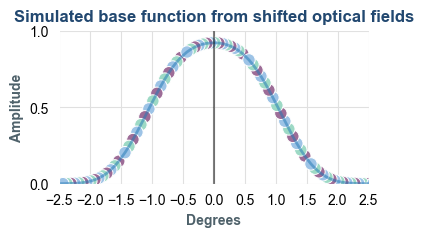

In [7]:
#| label: fig-3-3
#| fig-cap: "Base function with higher density of sampling points"
import pandas as pd
new_colors = []
for i in range(30):
        new_colors.append('#9D6C97')
        new_colors.append('#9DD9C5')
        new_colors.append('#9DC3E6')

# Create a color palette using the list of colors
my_palette = sns.color_palette(['#9D6C97', '#9DD9C5', '#9DC3E6'])


# c. Define input parameters for the optical field
mu_np = np.linspace(0, 0.9, 15)
std_np = np.linspace(1.2, 1.3, 1)
n = 3.4
number_points = 9984
degrees = [-16, 16]
number_windows = 32
window_size = number_points//number_windows
gap = 20
plots_gaussian = []

int_axis_interleaved = []
int_points_interleaved = []
colors_column = []
# d. Sweep mu parameter and do windown integration
color = 0 
for i in range(len(mu_np)):
    for j in range(len(std_np)):
        x = np.linspace(degrees[0], degrees[1], number_points)
        y = np.exp(-abs(((x-mu_np[i])/std_np[j]))**n)

        integration_axis, integration_points = window_integration(axes, number_windows, window_size, gap, x, y, True)

        int_axis_interleaved.extend(integration_axis-mu_np[i])
        int_points_interleaved.extend(integration_points)
        colors_column.extend([new_colors[color]]*32)
        color += 1

# e. Create df
df = pd.DataFrame({'x': int_axis_interleaved, 'y': int_points_interleaved, 'color': colors_column})

# f. Plot df in seaborn
fig, ax = plt.subplots(figsize=(4, 2))
sns.lineplot(data=df, x='x', y = 'y', linewidth=2, alpha = 0.5)
sns.scatterplot(data=df, x='x', y = 'y', hue='color', palette=my_palette, legend=False, s=80)

ax.axvline(x=0, color = 'black', alpha = 0.5)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(0, 1.01)
ax.set_title('Simulated base function from shifted optical fields', color = '#224870', fontweight='bold')
plot_format_plt('Degrees', 'Amplitude', 0.5, 0.5, ax)

## Experimental base function {#test}

The base function is meant to be a reference function in order to characterize wafer roughness. For such purpose, a very smooth wafer (0.1 nm in roughness) was measured at different angles. The base function was then reconstructed using the same procedure as the simulated base function. The experimental data is shown in @fig-3-4. The collected angles were from -1.0 to 1.0 degrees.

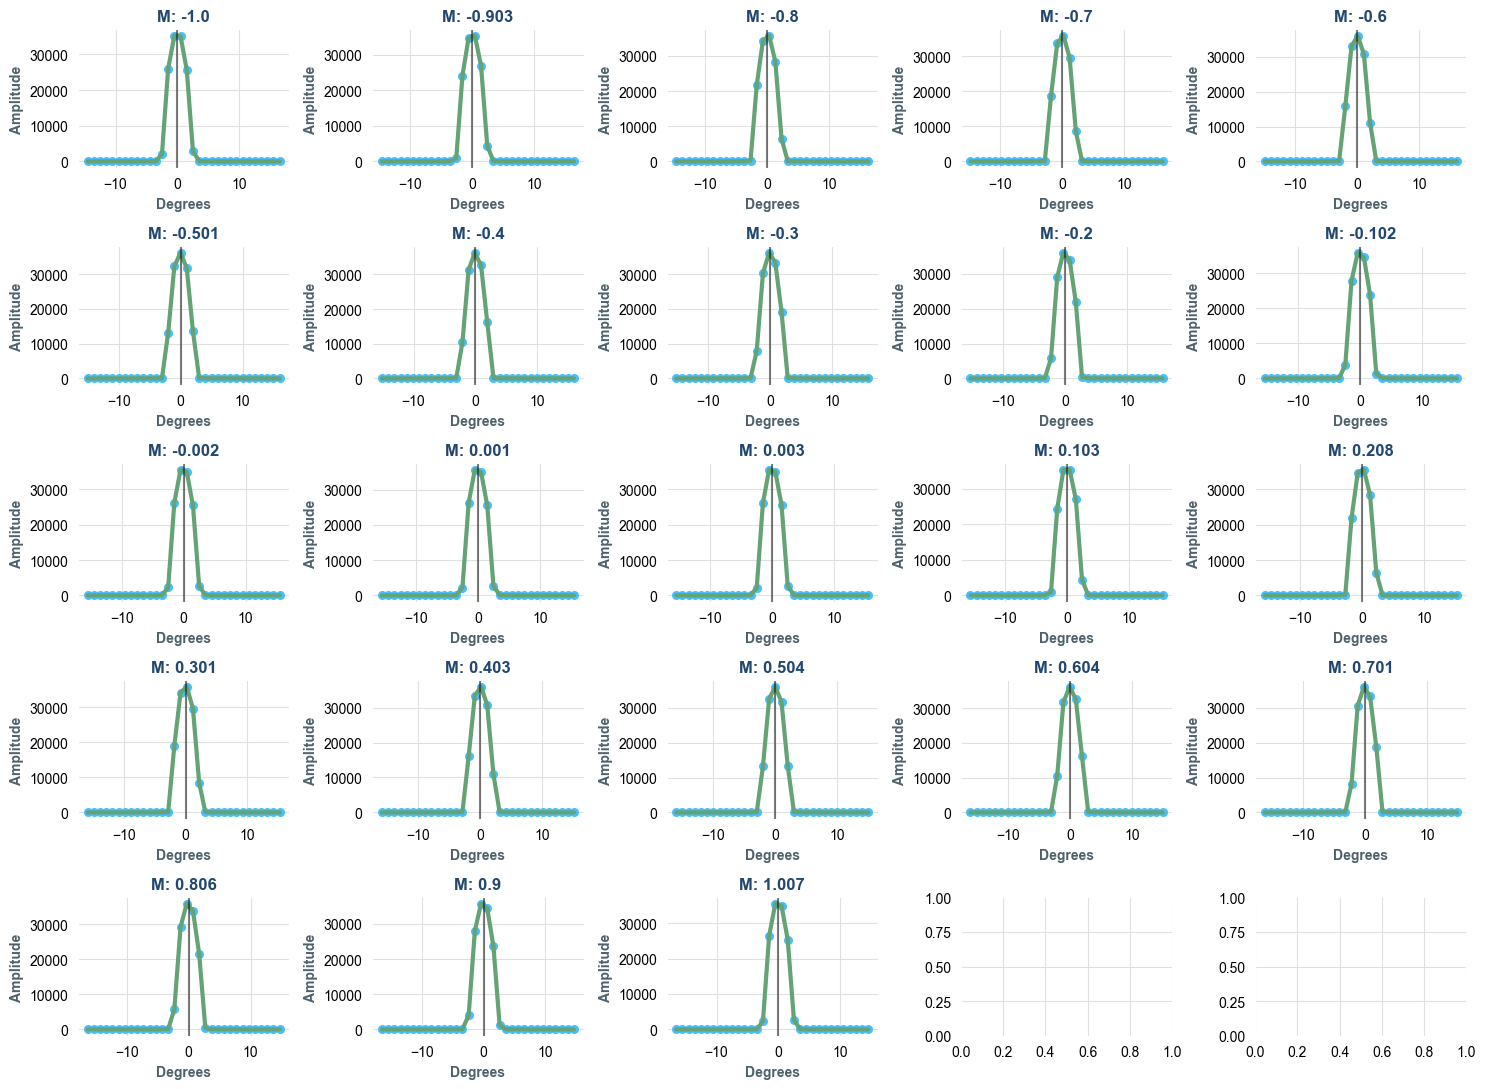

In [8]:
#| label: fig-3-4
#| fig-cap: "Smooth wafer experimental data for base function reconstruction"

# 1. Read the Excel file into a DataFrame
df = pd.read_excel('../data/a_base_function_1deg.xlsx', sheet_name=['base', 'M'])

# 2. Split the DataFrame into two separate DataFrames
base_df = df['base']
M_df = df['M'].sort_values(by='M')
sorted_df = pd.DataFrame(columns=['mu','xaxis', 'yaxis', 'colors'])

# 3. Create x axis
xaxis = np.arange(-15.5, 16.5, 1)
plots = []

rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 11), squeeze=False)

for i, (index, values) in enumerate(M_df.iterrows()):
    new_axis = xaxis - values.M
    row = i // cols
    col = i % cols

    axes[row,col].plot(new_axis, base_df[index], color='#63A375', linewidth=3)
    axes[row,col].scatter(new_axis, base_df[index], color='#48BEFF', s=30)
    axes[row, col].set_title((f'M: {values.M}'), color = '#224870', fontweight='bold')
    axes[row, col].axvline(x=0, color = 'black', alpha = 0.5)
    plot_format_plt('Degrees', 'Amplitude', 10, 10000, axes[row, col])

    sorted_df = sorted_df.append(pd.DataFrame(
        {'mu':[values.M]*32,'xaxis':new_axis, 'yaxis':base_df[index], 'colors':new_colors[0:32]}), ignore_index=True)
fig.tight_layout()


The procedure from the simulated base function was then applied to the experimental data. The results are shown in @fig-3-5. Notice that there are some overlaps in the sampling points, this is due to innacurate angle measurements. However, this base function can be use as a reference for further data correction.

One of the main difference between using just the Aq parameter compared to the base function is the number of sampling for very smooth wafers. The base function has a higher density of points in the tails as well as in the main peak. 



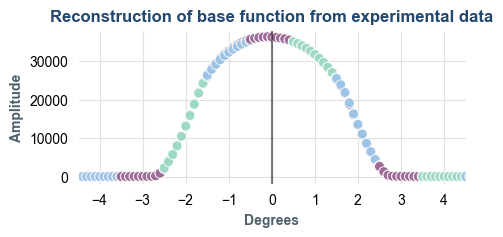

In [9]:
#| label: fig-3-5
#| fig-cap: "Reconstructed base function from experimental data"

base_function_df = sorted_df.sort_values(by='xaxis').reset_index(drop=True)
smooth_df = pd.DataFrame(data={}, columns=['xaxis', 'yaxis', 'colors'])
xoutindx=0

for aveindex in range(1, len(base_function_df)):
    if (base_function_df.loc[aveindex, 'xaxis'] - base_function_df.loc[aveindex-1, 'xaxis']) < 0.01:
        smooth_df.loc[xoutindx, 'xaxis'] = (base_function_df.loc[aveindex, 'xaxis'] + base_function_df.loc[aveindex-1, 'xaxis'])/2
        smooth_df.loc[xoutindx, 'yaxis'] = (base_function_df.loc[aveindex, 'yaxis'] + base_function_df.loc[aveindex-1, 'yaxis'])/2
        smooth_df.loc[xoutindx, 'colors'] = base_function_df.loc[aveindex, 'colors']
    else:
        xoutindx += 1
        smooth_df.loc[xoutindx, 'xaxis'] = base_function_df.loc[aveindex, 'xaxis']
        smooth_df.loc[xoutindx, 'yaxis'] = base_function_df.loc[aveindex, 'yaxis']
        smooth_df.loc[xoutindx, 'colors'] = base_function_df.loc[aveindex, 'colors']

# create the subplots
fig, ax = plt.subplots(figsize=(5, 2))
sns.scatterplot(data=base_function_df, x='xaxis', y = 'yaxis', hue='colors', palette=my_palette, legend=False, s=50, ax=ax)
ax.axvline(x=0, color = 'black', alpha = 0.5)
ax.set_xlim(-4.5, 4.5)
ax.set_title('Reconstruction of base function from experimental data', color = '#224870', fontweight='bold')
plot_format_plt('Degrees', 'Amplitude', 1.0, 10000, ax)

## On-axis and off-axis datasets

One of the limitations of the previous data, was that the exact incoming angle was not known, hence there was overlap in the sampling points. To compensate for this, a setup was built and shown in @fig-3-6 :

![OS500 head is attached to off-axis motor, and points at centre of rotation. Sample is attached to on-axis motor, and positioned at centre of rotation. Additionally there are two linear stages for positioning. All motors are PC controlled](figures/b/fig_3_2_setup.png){#fig-3-6}

With this setup it is possible to acquire datasets along the optosurf axis (on-axis) at different vertical off-axis misalignment positions. Both axes are illustrated in @fig-3-7 :

![On-axis datasets at off-axis positions. Data is collected along the on-axis position with scanning angles of 20 deg. The same dataset is collected at different off-axis positions for example at +- 0.15 deg. Notice that the amplitude decreases for off-axis positions.](figures/b/fig_3_3_onoffaxis.png){#fig-3-7}

One of the reasons for acquiring the dataset in both on-axis and off-axis positions is due to the very narrow peak obtained from the scattered light of the Si wafer. The idea is to acquire a dataset along the on-axis at 4000 angle positions (each position has a 32 points data trace) within +-20 deg, and at different off-axis positions for example between +- 0.15 deg. With these datasets it will be posible to reconstruct a base function at different off-axis positions and obtain the angles at which the new RMSE parameter will be valid for.

An example of a on-axis dataset is shown in @fig-3-8. Different traces are also shown for different positions along the mechanical axis. It is with the on-axis dataset that the base function will be reconstructed.

![On-axis dataset. The gray planes are cross-sections that represent that 32 sampling points optosurf traces](figures/b/fig_3_3_onaxis.png){#fig-3-8}

The off-axis data is taken along the perpendicular axis of the linear array. When the head is aligned at the center the intensity of the optical field will be maximum. As the mechanical axis scans, the amplitude will start decreasing due to the 'off-axis' alignment. The dataset is shown in @fig-3-9.

![On-axis dataset. The gray planes are cross-sections that represent that 32 sampling points optosurf traces](figures/b/fig_3_4_offaxis.png){#fig-3-9}

\newpage